In [1]:
import os
import sys
import sqlite3
from datetime import datetime
sys.path.append(os.path.join(os.getcwd(),'..','..','..'))
import ursse.path_assistant as pa
data_path = os.path.join(pa.shifts_folder,'shift_02_26_2020','transverse_scan') 
wd = pa.WorkingDirectory(data_path)
import ursse.transverse_scan.spad_counts as spad_counts
import ursse.transverse_scan.picomotor_pos as picomotor_pos
import ursse.transverse_scan.transverse_scan as transverse_scan
import matplotlib.pyplot as plt
import numpy as np

In [2]:
os.listdir(data_path)

['x_scan_wed_shift.db',
 'transverse_scan_SPAD_rate_vs_x_position.png',
 'count_rate_data_02_26_2020.txt']

In [3]:
x_scan_path = wd.fi('x_scan_wed_shift.db') 

In [4]:
picomotor_dates, picomotor_position, year = picomotor_pos.get_time_and_picomotor_pos_arr(x_scan_path)

In [5]:
spad_rate_path = wd.fi("count_rate_data_02_26_2020.txt")
spad_dates, spad_cnts = spad_counts.get_time_and_counts_arr(year, spad_rate_path)

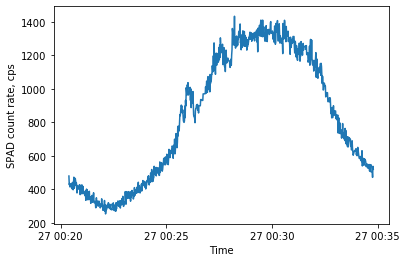

In [6]:
plt.plot(spad_dates, spad_cnts)
plt.xlabel("Time")
plt.ylabel("SPAD count rate, cps")
plt.show()

In [7]:
plt.plot(picomotor_position.transpose()[3], spad_cnts_interp)

NameError: name 'spad_cnts_interp' is not defined

In [8]:
picomotor_positions, spad_count_rates = transverse_scan.get_positions_and_counts_arrays(x_scan_path, spad_rate_path)

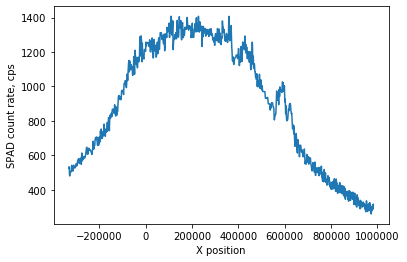

In [9]:
x_positions = picomotor_positions[3]
plt.plot(x_positions, spad_count_rates)
plt.xlabel("X position")
plt.ylabel("SPAD count rate, cps")
plt.show()

Testing how to plot 2D scans:

In [10]:
pos_test = picomotor_positions.copy()
n = 4
for i in range(n):
    cp = picomotor_positions.copy()
    cp[0,:] = picomotor_positions[0,0]-(i+1)*1000
    pos_test = np.concatenate((pos_test,cp),axis=1)
spad_count_rates_test = np.concatenate([spad_count_rates for i in range(n+1)])

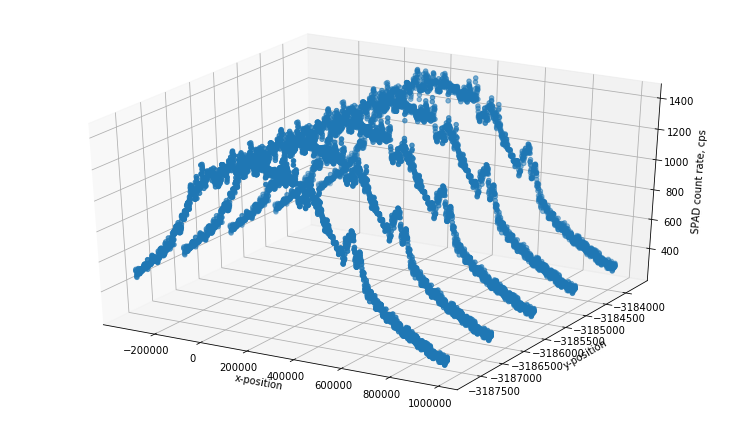

In [11]:
xs = pos_test[3]
ys = pos_test[0]
zs = spad_count_rates_test
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(13, 7.5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, ys, zs)
ax.set_xlabel('x-position')
ax.set_ylabel('y-position')
ax.set_zlabel('SPAD count rate, cps')
plt.show()